In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('test.csv')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
df.isna().sum()
# Age, Fare, Cabin

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

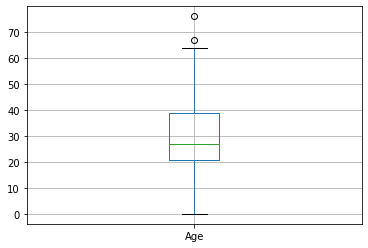

In [8]:
# Age 박스플롯
df.boxplot(['Age']);

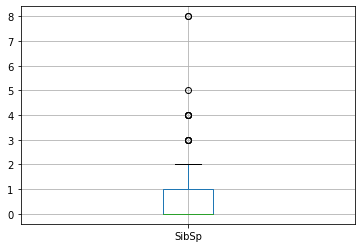

In [9]:
# SibSp 박스플롯
df.boxplot(['SibSp']);

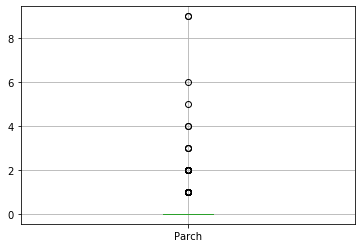

In [10]:
# Parch 박스플롯 - 이상치
df.boxplot(['Parch']);

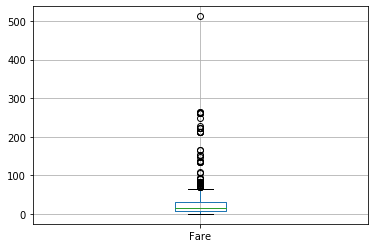

In [12]:
# Fare 박스플롯
df.boxplot(['Fare']);

In [62]:
# Age 결손 데이터 대체 - 평균
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Age'].isna().sum()

0

In [63]:
# SibSp & Parch 이상치 제거
from scipy import stats
df['SibSp_Z'] = stats.zscore(df['SibSp'])
df['Parch_Z'] = stats.zscore(df['Parch'])
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Z,Parch_Z
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,-0.499470,-0.400248
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.616992,-0.400248
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,-0.499470,-0.400248
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,-0.499470,-0.400248
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0.616992,0.619896


In [64]:
df = df[df['SibSp_Z'].between(-2,2)]
df = df[df['Parch_Z'].between(-2,2)]
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,SibSp_Z,Parch_Z
count,398.000000,398.000000,398.000000,398.000000,398.000000,397.000000,398.000000,398.000000
mean,1100.836683,2.251256,30.309931,0.329146,0.253769,33.191835,-0.131991,-0.141367
std,120.809595,0.841126,12.450162,0.540272,0.566418,52.347460,0.603194,0.577828
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,-0.499470,-0.400248
25%,995.250000,1.000000,23.000000,0.000000,0.000000,7.879200,-0.499470,-0.400248
50%,1103.500000,3.000000,30.272590,0.000000,0.000000,13.775000,-0.499470,-0.400248
75%,1203.750000,3.000000,35.000000,1.000000,0.000000,28.537500,0.616992,-0.400248
max,1309.000000,3.000000,76.000000,2.000000,2.000000,512.329200,1.733455,1.640039


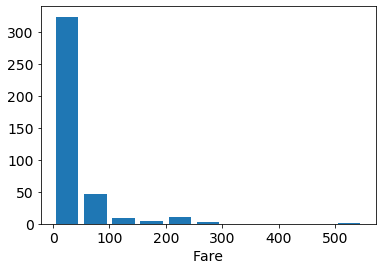

In [65]:
# Fare 히스토그램
bins = np.arange(0,600,50)
plt.hist(df['Fare'], bins, rwidth=0.8)
plt.xlabel('Fare', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14);

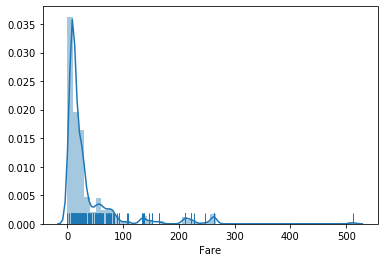

In [19]:
sns.distplot(df['Fare'], rug=True)
plt.show()

In [66]:
# Fare 결손 데이터 대체 - 중앙값
df["Fare"]=df["Fare"].fillna(df["Fare"].median())
df["Fare"].isna().sum()

0

In [67]:
# Fare 이상치 제거
df[df["Fare"]<5]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Z,Parch_Z
21,913,3,"Olsen, Master. Artur Karl",male,9.00000,0,1,C 17368,3.1708,NaN,S,-0.49947,0.619896
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,30.27259,0,0,112051,0.0000,NaN,S,-0.49947,-0.400248
372,1264,1,"Ismay, Mr. Joseph Bruce",male,49.00000,0,0,112058,0.0000,B52 B54 B56,S,-0.49947,-0.400248


In [68]:
df[df["Fare"]>250]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_Z,Parch_Z
59,951,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C,-0.499470,-0.400248
64,956,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1.733455,1.640039
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,-0.499470,0.619896
375,1267,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,-0.499470,-0.400248


In [69]:
df=df[df["Fare"].between(3, 300)]
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,SibSp_Z,Parch_Z
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,1099.939241,2.260759,30.192607,0.331646,0.253165,32.097732,-0.129200,-0.141984
std,120.763125,0.837178,12.383067,0.541558,0.567038,46.536644,0.604629,0.578460
min,892.000000,1.000000,0.170000,0.000000,0.000000,3.170800,-0.499470,-0.400248
25%,994.500000,1.000000,23.000000,0.000000,0.000000,7.883350,-0.499470,-0.400248
50%,1102.000000,3.000000,30.272590,0.000000,0.000000,13.775000,-0.499470,-0.400248
75%,1202.500000,3.000000,35.000000,1.000000,0.000000,28.518750,0.616992,-0.400248
max,1309.000000,3.000000,76.000000,2.000000,2.000000,262.375000,1.733455,1.640039


In [70]:
# Cabin 칼럼 삭제
df_new = df.drop('Cabin', axis=1)
df_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,SibSp_Z,Parch_Z
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,-0.499470,-0.400248
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0.616992,-0.400248
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,-0.499470,-0.400248
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,-0.499470,-0.400248
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0.616992,0.619896


In [71]:
df_new.drop('SibSp_Z',axis=1, inplace=True)
df_new.drop('Parch_Z',axis=1, inplace=True)

In [73]:
df_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [74]:
df_new.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [75]:
df_new.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,1099.939241,2.260759,30.192607,0.331646,0.253165,32.097732
std,120.763125,0.837178,12.383067,0.541558,0.567038,46.536644
min,892.000000,1.000000,0.170000,0.000000,0.000000,3.170800
25%,994.500000,1.000000,23.000000,0.000000,0.000000,7.883350
50%,1102.000000,3.000000,30.272590,0.000000,0.000000,13.775000
75%,1202.500000,3.000000,35.000000,1.000000,0.000000,28.518750
max,1309.000000,3.000000,76.000000,2.000000,2.000000,262.375000
